# Introduction to Anomaly Detection
**_Author:_** Pramit Choudhary (pramit@datascience.com)

**_Audience:_** Novice/Beginner      

**_Professional Experience:_** No Experience/Some years od Experience

**_Skills needed:_** basic knowledge of calculus(integrals), python and machine learning

## 1. Prerequesities
This blog/tutorial is intended for novice or beginners in the field of data science/machine learning. Almost no formal professional experience is needed to follow the content of this tutorial. Basic knowledge of python, functional programming and Machine learning is sufficient to understand and adapt. The content provides a lot of reference material for further reading inline as well for interested readers and practioners. 

## 2. Introduction
  
  Anomaly detection refers to the problem of identifying unusual patterns that do not confirm to expected behavior. The non-confirming patterns are known to us in different forms such as outliers, exceptions or surprises. This technique of identifying anomalous behviour or outliers in the data has many applications. It could range from a strange pattern in network traffic that could help one in identifying a hack in network security(_intrusion detection_), identifying the presence of malignant tumor in an MRI scan(*system health monitoring*), detecting fraudulent credit transactions on a dating website(*fraud detection*) to monitoring events to identify faults in Operating environment(*fault detection*) and many more [wiki](https://en.wikipedia.org/wiki/Anomaly_detection). In this post, we will be taking a step back and try to understand the core problem of detecting anomalies using a simple statistical technique techniques like Simple Moving Average(SMA)/Simple Low-pass filter to establish the core foundations. We will be using **discrete linear convolution** for computing rolling mean in this discussion and together implement a simple generic solution to detect outliers on a couple of use-cases.

## 3. What are Anomalies ?
  Before we move on, its important to establish some boundaries in the definition of an Anomaly. Anomaly Detection is similar but different from noise removal and novelty detection. **Novelty Detection** deals with identifying an unobserved pattern in new observations not included in the training data, like a sudden interest in a new channel on YouTube during Christmas. On the other hand, **Noise Removal** ([NR](http://datamining.rutgers.edu/publication/tkdehcleaner.pdf)) deals immunizing analysis from the occurrence of unwanted observations, in other words removing noise from meaningful signal. 
Anomaly could be broadly categorized as 
   1. **Point Anomalies:** A single instance of data is anomalous if its too far off from the rest.
       _Business Use-Case:_ Detecting credit card fraud based on 'Amount Spend'
   2. **Contextual Anomalies:** Abnormality is attributed wrt specific context. These type of anomalies are common in
       time-series based datasets.
       _Business Use-Case:_ Spending $100 on food everyday during Christmas is normal but may be odd otherwise
   3. **Collective Anomalies:** A set of data instances collectively helps in detecting Anomaly.
       _Business Use-Case:_ A cyber-attack could be flagged based on ( _buffer-overflow, ssh, ftp_ ) if someone is
       trying to copy data from a remote Machine to a local host unexpectedily 

## 4. Different Techniques
### 4.1 A Simple Statistical Method:
  To identify irregularities in the data, a simplest approach could be to flag the data points that deviate(could be based on rule) from the common statistical properties of a distribution like mean, median, mode and quantiles. For this discussion, lets say the definition of a data point being an Anomaly is when it deviates by a certain standard deviation([68-95-99.7](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)) from the mean. Travesing mean over a time-series data is however not trivial as it's not static. One would need a rolling window to compute the average acoss the datapoints. Technically this is defined as Rolling Average or a Moving Average to smoothen the short term fluctuation and highlight high term fluctuation. Mathematically, a n-period simple moving average can also be defined as a *Low Pass Filter*. A more sophisticated filter could be a *Kalman Filter*. Details about Kalman Filter would be shared in the up-coming posts, interested readers can find a very intuitive explanation [here]( http://www.bzarg.com/p/how-a-kalman-filter-works-in-pictures/) 

#### Challenges: 
  The approach of using a Low Pass Filter would work for a simple use-cases but there may be other challenges which
  makes it difficult to scale, namely
  * The boundary between normal and abnormal behavior is often not precise. The data may contain noise which might be
    similar to abnormal behavior.
  * Difficult to scale when the malicious adversaries constantly adapt themselves. The definition of abnormal or
    normal may frequently change and threshold based on Moving Average may not apply anymore.
  * Difficult to scale to identify change in pattern based on seasonality. This involves more sophisticated methods in
    which one might have to decompose the data into multiple trends to indetify the change in seasonality.


### 4.2   More popular Machine Learning Based Approach:
  This section introduces a brief overview of some of the popular techinques used for Anomaly Detection. Future post on this topic will dive into the details on some of these concepts. 
#### 4.2.1 Density based Technique: 
  Denisty based Technique is based on the concept of Nearest Neighbors. 
  
  *Assumption:* Normal data points occur around a dense neighborhood and abnormalities are far away. 
  
  The nearest set of data points are evaluated using a score which could be Eucledian distance or a similarity measure
  dependent on the type of the data(Categorical or Numerical). They could be broadly classified into 2 algorithms
  1. [K-Nearest Neighbor](http://www.scholarpedia.org/article/K-nearest_neighbor): k-NN is a simple, non-parametric,
     lazy learning technique used to classify data based on similarities in distance metrics such as Eucledian,
     Manhattan, Minkowski, or Hamming distance.
  2. Relative Density of each data: This is better known as [LOF(Local Outlier Factor)](http://link.springer.com/article/10.1007%2Fs10618-012-0300-z). This concept is based on a
     distance metric called reachability distance. 
  
#### 4.2.2 Clustering Based Technique:  
  Clustering is one of the most popular concept in the domain of Unsupervised Learning.
  
  *Assumption:* Data points that are similar tend to belong to similar groups or clusters based on the notion of
   distance from local centroids
   
  [K-means](https://en.wikipedia.org/wiki/K-means_clustering) is a widely used clustering algorithm. It creates 'k'
  similar clusters of data points and data instances that fall outside these groups could potentially be marked as
  Anomalies. 

#### 4.3.3. Support Vector Machine Based: 
  [Support Vector Machine](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.675.575&rep=rep1&type=pdf) is another effective technique to explore. SVM is typically associated with supervised learning technique but there are extensions(OneClassCVM: _follow the link above for more details_) that could be used to solve the same as an Unsupervised problem(training data is not labeled). The algorithm learns a soft boundary to cluster the normal data instances using the trainset and then using the test instance to tune itself in identifying the abnormalities that falls outside the learned region.

Depending on the use-case, the output of an Anomaly Detector could be numeric scalar values for filtering on domain specific thresholds or textual Labels(Binary/Multi Labels).

## 5. Illustration of a simple Technique using Low Pass Filter
  For this tutorial Anomaly is defined as irregularities from the common norm in the data analyzed.
  This section focuses on realizing a simple anomaly detection package. We will be using Moving Average to build our
  first solution. For this discussion, we will be using a datasets where one observes the number of
  sunspots(darkspots) over a peroid of time and explore if we can find anomalies in the number of sunspots/month. 
  More detailed information about the same is mentioned below,
  1. **Dataset Information:**
  The dataset used in this example could be queried from the following [location](http://www-
  personal.umich.edu/~mejn/cp/data/sunspots.txt). One can use the following command to download the same 
  ```bash 
  wget -c -b http://www-personal.umich.edu/~mejn/cp/data/sunspots.txt 
  ```
  2. **Details about the data:** The file has 3143 rows which contains info about SunSpots collected from
     approximately 1749-1984. Sunspots are defined as dark spots on the surface of the sun. The study of sun
     spots helps scientist understand the sun's properties over a peroid of time, in particular its magnetic
     properties.
  3. **Moving Average using discrete linear convolution:** Convolution is a mathematical operation on two functions to
     produce a third function. Mathematically it could be described as integral of the product of two functions, after
     one is reversed and shifted:
     $f*g(t)$ = $\int_{-\infty}^{\infty} f(T)*g(t-T) dT$, 
     where $f(T)$ is an input function containing the quantity of interest (e.g. sunspots count at time $T$, $g(t-T)$ is the weighting function
     shifted by an amount $t$. This way as $t$ changes, different weights are assigned to the input function $f(T)$. 
     In our case,  $f(T)$ represents the sunspot counts at time $T$. $g(t-T)$ is the moving average kernel.
     This [blog](http://matlabtricks.com/post-11/moving-average-by-convolution) is a great read to understand the
     concept and core principles around the same. Would recommend everyone to scan through the same.

``` python
from __future__ import division
from itertools import izip, count
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

# 1. Download sunspot dataset and upload the same to dataset directory
#    Load the sunspot dataset as an Array
!mkdir -p dataset
!wget -c -b http://www-personal.umich.edu/~mejn/cp/data/sunspots.txt -P dataset
data = loadtxt("dataset/sunspots.txt", float)

# 2. View the data as a table
data_as_frame = pd.DataFrame(data, columns=['Months', 'SunSpots'])
data_as_frame.head()
```

In [2]:
from __future__ import division
from itertools import izip, count
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

In [3]:
# 1. Download sunspot dataset and upload the same to dataset directory
#    Load the sunspot dataset as an Array
!mkdir -p dataset
!wget -c -b http://www-personal.umich.edu/~mejn/cp/data/sunspots.txt -P dataset
data = loadtxt("dataset/sunspots.txt", float)

# 2. View the data as a table
data_as_frame = pd.DataFrame(data, columns=['Months', 'SunSpots'])
data_as_frame.head()

Continuing in background, pid 26451.
Output will be written to 'wget-log'.


,Months,SunSpots
0,0.0,58.0
1,1.0,62.6
2,2.0,70.0
3,3.0,55.7
4,4.0,85.0


```python
# 3. Lets define some use-case specific UDF(User Defined Functions)

def moving_average(data, window_size):
    """ Computes moving average using discrete linear convolution of two one dimensional sequences. 
    Args:
    -----
            data (pandas.Series): independent variable 
            window_size (int): rolling window size

    Returns:
    --------
            ndarray of linear convolution
            
    References:
    ------------
    [1] Wikipedia, "Convolution", http://en.wikipedia.org/wiki/Convolution.
    [2] API Reference: https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html
         
    """
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')


def explain_anomalies(y, window_size, sigma=1.0):
  """ Helps in exploring the anamolies using stationary standard deviation
    Args:
    -----
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma (int): value for standard deviation
    
    Returns:
    --------
        a dict (dict of 'standard_deviation': int, 'anomalies_dict': (index: value)) 
        containing information about the points indentified as anomalies
    
    """
    avg = moving_average(y, window_size).tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    std = np.std(residual)
    return {'standard_deviation': round(std, 3), 
            'anomalies_dict': collections.OrderedDict([(index, y_i) for 
                                                       index, y_i, avg_i in izip(count(), y, avg) 
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))])}
        
        
def explain_anomalies_rolling_std(y, window_size, sigma=1.0):
    """ Helps in exploring the anamolies using rolling standard deviation
    Args:
    -----
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma (int): value for standard deviation
    
    Returns:
    --------
        a dict (dict of 'standard_deviation': int, 'anomalies_dict': (index: value)) 
        containing information about the points indentified as anomalies
    """
    avg = moving_average(y, window_size)
    avg_list = avg.tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    testing_std = pd.rolling_std(residual, window_size)
    testing_std_as_df = pd.DataFrame(testing_std)
    rolling_std = testing_std_as_df.replace(np.nan, 
                                  testing_std_as_df.ix[window_size - 1]).round(3).iloc[:,0].tolist()
    std = np.std(residual)
    return {'stationary standard_deviation': round(std, 3), 
            'anomalies_dict': collections.OrderedDict([(index, y_i) 
                                                       for index, y_i, avg_i, rs_i in izip(count(), 
                                                                                           y, avg_list, rolling_std) 
              if (y_i > avg_i + (sigma * rs_i)) | (y_i < avg_i - (sigma * rs_i))])}


# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    """ Helps in generating the plot and flagging the anamolies. 
        Supports both moving and stationary standard deviation. Use the 'applying_rolling_std' to switch 
        between the two.
    Args:
    -----
        x (pandas.Series): dependent variable
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma_value (int): value for standard deviation
        text_xlabel (str): label for annotating the X Axis
        text_ylabel (str): label for annotatin the Y Axis
        applying_rolling_std (boolean): True/False for using rolling vs stationary standard deviation
    """
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 1000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)
    
    # Query for the anomalies and plot the same
    events = {}
    if applying_rolling_std:
        events = explain_anomalies_rolling_std(y, window_size=window_size, sigma=sigma_value)
    else:
        events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)
            
    x_anomaly = np.fromiter(events['anomalies_dict'].iterkeys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].itervalues(), dtype=float, 
                                            count=len(events['anomalies_dict']))
    plt.plot(x_anomaly, y_anomaly, "r*", markersize=12)
    
    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()
 
 
# 4. Lets play with the functions
x = data_as_frame['Months']
Y = data_as_frame['SunSpots']

# plot the results
plot_results(x, y=Y, window_size=10, title_for_plot="Anomalies in Sun Spots Using Stationary Standard Deviation", text_xlabel="Months", sigma_value=3, text_ylabel="Number of Sun Spots")

# Get details about the data flagged as annomalies
events = explain_anomalies(y=Y, window_size=10, sigma=3)

# Display the anomaly dict
print("Information about the anomalies model:{}".format(events))
```

In [4]:
def moving_average(data, window_size):
    """ Computes moving average using discrete linear convolution of two one dimensional sequences. 
    Args:
    -----
        data (pandas.Series): independent variable 
        window_size (int): rolling window size

    Returns:
    --------
        ndarray of linear convolution
            
    References:
    ------------
    [1] Wikipedia, "Convolution", http://en.wikipedia.org/wiki/Convolution.
    [2] API Reference: https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html     
    """
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

def explain_anomalies_rolling_std(y, window_size, sigma=1.0):
    """ Helps in exploring the anamolies using rolling standard deviation
    Args:
    -----
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma (int): value for standard deviation
    
    Returns:
    --------
        a dict (dict of 'standard_deviation': int, 'anomalies_dict': (index: value)) 
        containing information about the points indentified as anomalies
    """
    avg = moving_average(y, window_size)
    avg_list = avg.tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    testing_std = pd.rolling_std(residual, window_size)
    testing_std_as_df = pd.DataFrame(testing_std)
    rolling_std = testing_std_as_df.replace(np.nan, 
                                  testing_std_as_df.ix[window_size - 1]).round(3).iloc[:,0].tolist()
    std = np.std(residual)
    return {'stationary standard_deviation': round(std, 3), 
            'anomalies_dict': collections.OrderedDict([(index, y_i) 
                                                       for index, y_i, avg_i, rs_i in izip(count(), 
                                                                                           y, avg_list, rolling_std) 
              if (y_i > avg_i + (sigma * rs_i)) | (y_i < avg_i - (sigma * rs_i))])}
              
def explain_anomalies(y, window_size, sigma=1.0):
    """ Helps in exploring the anamolies using stationary standard deviation
    Args:
    -----
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma (int): value for standard deviation
    
    Returns:
    --------
        a dict (dict of 'standard_deviation': int, 'anomalies_dict': (index: value)) 
        containing information about the points indentified as anomalies
    """
    avg = moving_average(y, window_size)
    avg_list = avg.tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    std = np.std(residual)
    return {'stationary standard_deviation': round(std, 3), 
            'anomalies_dict': 
            collections.OrderedDict([(index, y_i) for index, y_i, avg_i in izip(count(), y, avg_list) 
              if (y_i > avg_i + (sigma * std)) | (y_i < avg_i - (sigma * std))])}

# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results(x, y, window_size, title_for_plot, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    """ Helps in generating the plot and flagging the anamolies. 
        Supports both moving and stationary standard deviation
    Args:
    -----
        x (pandas.Series): dependent variable
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma_value (int): value for standard deviation
        text_xlabel (str): label for annotating the X Axis
        text_ylabel (str): label for annotatin the Y Axis
    """
    fig = plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 1000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)
    fig.suptitle(title_for_plot, fontsize=20)
    
    # Query for the anomalies and plot the same
    events = {}
    if applying_rolling_std:
        events = explain_anomalies_rolling_std(y, window_size=window_size, sigma=sigma_value)
    else:
        events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)
            
    x_anomaly = np.fromiter(events['anomalies_dict'].iterkeys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].itervalues(), dtype=float, count=len(events['anomalies_dict']))
    plt.plot(x_anomaly, y_anomaly, "r*", markersize=12)
    
    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()

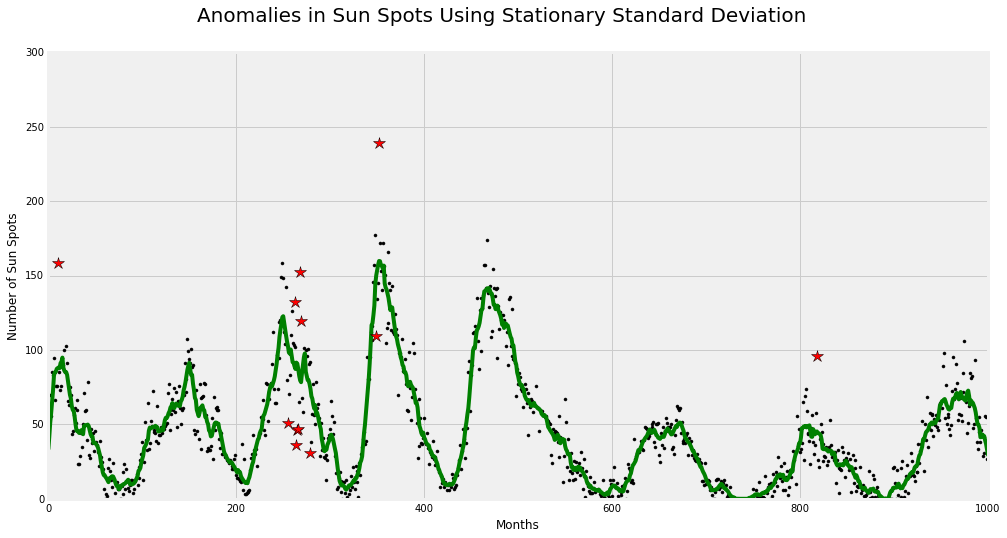

Information about the anomalies model:{'anomalies_dict': OrderedDict([(10, 158.59999999999999), (255, 51.0), (262, 132.19999999999999), (264, 36.0), (265, 46.200000000000003), (266, 46.700000000000003), (268, 152.69999999999999), (269, 119.5), (278, 31.100000000000001), (349, 109.3), (352, 238.90000000000001), (818, 96.200000000000003), (1055, 206.30000000000001), (1056, 188.0), (1087, 131.19999999999999), (1088, 132.69999999999999), (1172, 107.09999999999999), (1182, 52.200000000000003), (1184, 160.90000000000001), (1185, 180.40000000000001), (1456, 176.0), (1464, 88.299999999999997), (1735, 129.19999999999999), (1882, 107.2), (1890, 103.59999999999999), (1893, 17.800000000000001), (1897, 108.2), (2023, 154.5), (2045, 111.2), (2171, 108.0), (2274, 165.30000000000001), (2380, 201.30000000000001), (2389, 86.099999999999994), (2390, 94.799999999999997), (2391, 189.69999999999999), (2398, 95.799999999999997), (2401, 182.30000000000001), (2494, 201.30000000000001), (2497, 130.3000000000000

In [5]:
x = data_as_frame['Months']
Y = data_as_frame['SunSpots']

# plot the results
plot_results(x, y=Y, window_size=10, title_for_plot="Anomalies in Sun Spots Using Stationary Standard Deviation",
             text_xlabel="Months", sigma_value=3, text_ylabel="Number of Sun Spots")

# Get details about the data flagged as annomalies
events = explain_anomalies(y=Y, window_size=10, sigma=3)

# Display the anomaly dict
print("Information about the anomalies model:{}".format(events))

Lets see if the above anomaly detection function could be used for another use-case. For this tutorial lets assume that we generate a random dataset which hypothetically relates to Company A's stock value over a peroid of time. X Axis represents Time in days(since 2013) and Y Axis represents the value of the Stock in dollars($). 

```python
# Convenience function to add noise
def noise(yval):
    """ Helper function to generate random points """
    np.random.seed(0)
    return 0.2*np.asarray(yval)*np.random.normal(size=len(yval))
    
# Generate a random dataset
def generate_random_dataset(size_of_array=1000, random_state=0):
    """ Helps in generating a random dataset which has a normal distribution
    Args:
    -----
        size_of_array (int): number of data points
        random_state (int): to initialize a random state 

    Returns:
    --------
        a list of data points for dependent variable, pandas.Series of independent variable
    """
    np.random.seed(random_state)
    y = np.random.normal(0, 0.5, size_of_array)
    x = range(0, size_of_array)
    y_new = [y_i + index**((size_of_array - index)/size_of_array) +  noise()
     for index, y_i in izip(count(), y)]
    return x, pd.Series(y_new)
    
    
# Lets play
x1, y1 = generate_random_dataset()
# Using stationary standard deviation over a continuous sample replicating 
plot_results(x1, y1, window_size=50, title_for_plot="Anomalies in Stock Value Using Stationary Standard", sigma_value=2, text_xlabel="Time (Days)", text_ylabel="Value (US Dollars)")
 
# using rolling standard deviation
plot_results(x1, y1, window_size=50, title_for_plot="Anomalies in Stock Value Using Rolling Standard Deviation Deviation", sigma_value=2, text_xlabel="Time (Days)", text_ylabel="Value (US Dollars)", applying_rolling_std=True)
```

In [6]:
# Convenience function to add noise
def noise(yval):
    """ Helper function to generate random points """
    np.random.seed(0)
    return 0.2*np.asarray(yval)*np.random.normal(size=len(yval))
    
# Generate a random dataset
def generate_random_dataset(size_of_array=1000, random_state=0):
    """ Helps in generating a random dataset which has a normal distribution
    Args:
    -----
        size_of_array (int): number of data points
        random_state (int): to initialize a random state 

    Returns:
    --------
        a list of data points for dependent variable, pandas.Series of independent variable
    """
    np.random.seed(random_state)
    y = np.random.normal(0, 0.5, size_of_array)
    x = range(0, size_of_array)
    y_new = [y_i + index**((size_of_array - index)/size_of_array) 
             for index, y_i in izip(count(), y)]
    y_new = y_new + noise(y_new)
    return x, pd.Series(y_new)

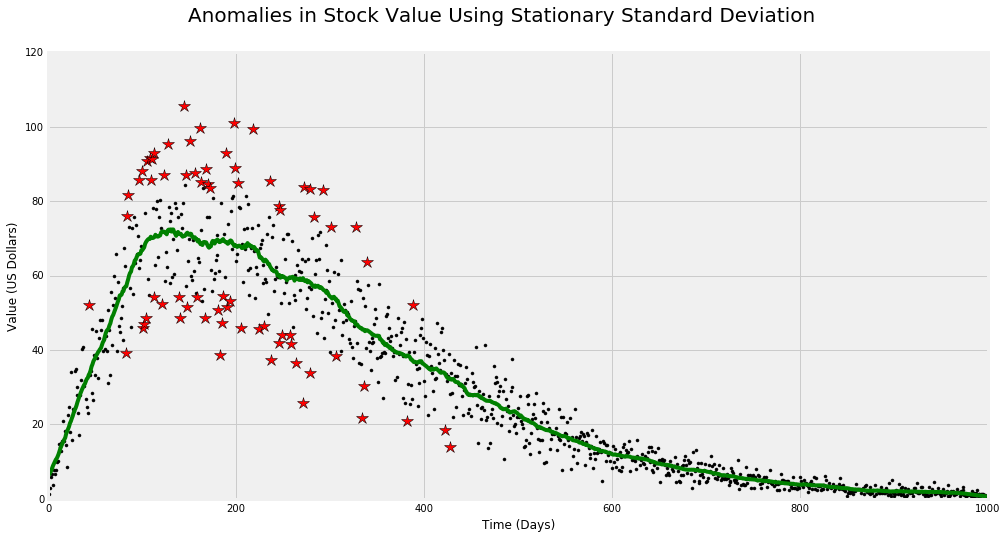

In [9]:
x1, y1 = generate_random_dataset()
plot_results(x1, y1, window_size=50, title_for_plot="Anomalies in Stock Value Using Stationary Standard Deviation", 
             sigma_value=2, text_xlabel="Time (Days)", text_ylabel="Value (US Dollars)")

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:37: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).std()


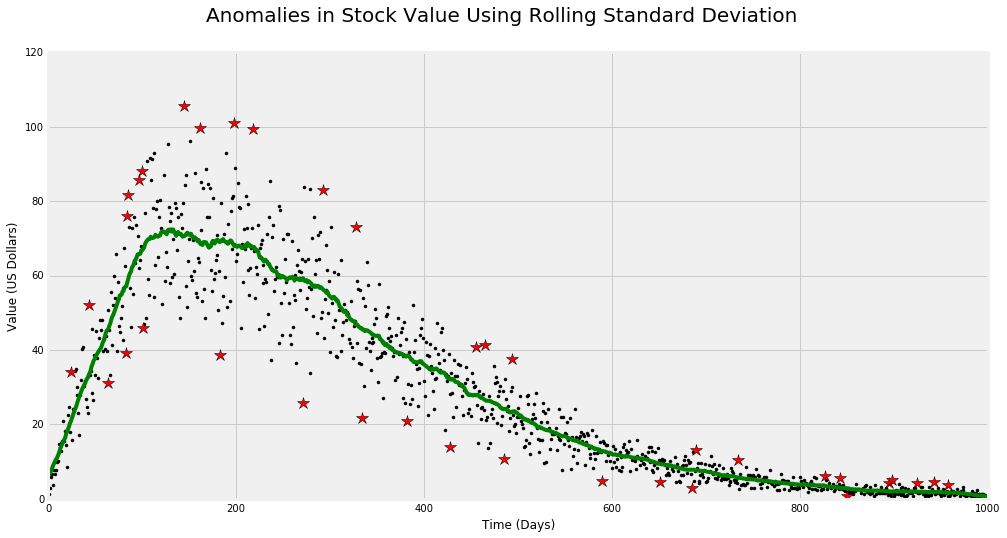

In [10]:
plot_results(x1, y1, window_size=50, title_for_plot="Anomalies in Stock Value Using Rolling Standard Deviation", 
             sigma_value=2, text_xlabel="Time (Days)", text_ylabel="Value (US Dollars)", applying_rolling_std=True)

Looks like our Anomaly Detector is doing a decent job. It is able to detect data points which are 2-sigma away from the fitted curve. Depending **on the distribution of a use-case in a time-series setting and dynamicity of the environment** one may decide to use stationary(global) or non-stationary(local) standard deviation to stabilize a model. The mathematical function around the standard deviation could be modified very easily to use a customized formulation of the same. 

**Note:** The analysis on the generated dataset or the use-case related to darkspots/or generatd data is to highlight how one can quickly realize a simple anomaly detector. This necessarily is not the most efficient solution.

### 6. Conclusion:
  As a part of this tutorial, the idea is to introduce the users to problem on Anomaly Detection and some of the popular techniques around the same. As a working illustration, Low Pass Filter using Simple Moving Average(SMA) is used to detect abnormalities on sample examples. The tutorial also introduces very briefly some of the other Machine Learning techniques namely K-Nearest Neighbor, K-means clustering and one-class SVM. In the upcoming tutorials, we will dive deeper into how to solve specific use-cases with the most relevant technique in an efficient way.

### 7. References:
  * ABE, N., Zadrozny, B., and Langford, J. 2006. Outlier detection by active learning. In Proceedings of the 12th ACM
    SIGKDD International Conference on Knowledge Discovery and Data Mining. ACM Press, New York, 504–509
  * V Chandola, A Banerjee and V Kumar 2009.  Anomaly Detection: A Survey Article No. 15 in ACM Computing Surveys 
  * http://datascience.stackexchange.com/questions/6547/open-source-anomaly-detection-in-python
  * Rolling window using pandas: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html
  * Ted Dunning, Ellen Freidman, A New Look at Anomaly Detection http://shop.oreilly.com/product/0636920034650.do
  * Moving median decomposition(what if moving mean does not work): https://anomaly.io/anomaly-detection-moving-median-decomposition/
  * Recent publications references: https://sites.google.com/site/icmlworkshoponanomalydetection/accepted-papers
  * Others: http://resources.sei.cmu.edu/asset_files/Presentation/2013_017_001_51271.pdf